In [1]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np


# Signals

## Continuous-time signals

### Plotting

1. Compute the signal

   $$
   x_1(t)=5\sin{12t}
   $$

   at 500 points in the time interval $0\leq t\leq 5\text{s}$ and graph the result.


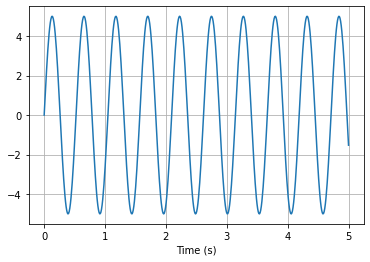

In [2]:
t = np.linspace(0, 5, 500)
x1 = 5*np.sin(12*t)

plt.plot(t, x1)
plt.xlabel("Time (s)")
plt.grid()
plt.show()


2. Compute and graph the signal

$$
\begin{gather*}
	x_2(t)=
	\begin{cases}
		e^{−3t} − e^{−6t} & t \geq 0\\
		0                 & t < 0
	\end{cases}
\end{gather*}
$$

in the time interval $−2\leq t \leq3\text{s}$ using a time increment of $\Delta t = 0.01\text{s}$


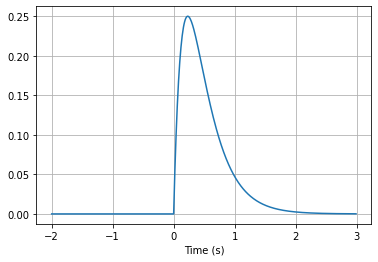

In [3]:
t = np.arange(-2, 3, 0.01)
x2 = (np.exp(-3*t)-np.exp(-6*t))*(t >= 0)

plt.plot(t, x2)
plt.xlabel("Time (s)")
plt.grid()
plt.show()


3. Compute and graph the signal

$$
\begin{gather*}
    x_3(t)=
    \begin{cases}
        e^{−3t} − e^{−6t} & 0\leq t \leq 1\\
        0                 & \text{else}
    \end{cases}
\end{gather*}
$$

in the time interval $−2\leq t\leq 3\text{s}$ using a time increment of $\Delta t = 0.01\text{s}$


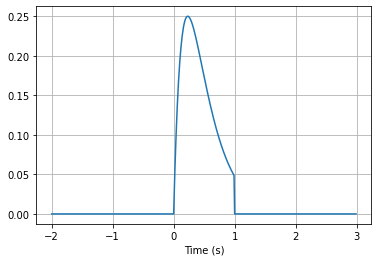

In [4]:
x3 = (np.exp(-3*t)-np.exp(-6*t))*(t >= 0)*(t <= 1)

plt.plot(t, x3)
plt.xlabel("Time (s)")
plt.grid()
plt.show()


### Basic operations

1. Implement a function for the unit-step signal. Employ this function to plot the unit-pulse signal

$$
x_1(t)=\Pi(t)=u\left(t+\frac{1}{2}\right)-u\left(t-\frac{1}{2}\right)
$$

in the interval $−2\leq t\leq 2$ using a time increment of $\Delta t = 0.001\text{s}$.

> **Note**: call this function `ctstep`.


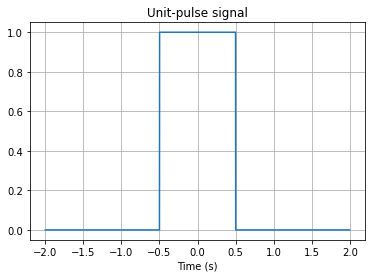

In [9]:
def ctStep(t):
    return 1*(t >= 0)


t = np.arange(-2, 2, 0.001)
x1 = ctStep(t+1/2)-ctStep(t-1/2)

plt.plot(t, x1)
plt.title('Unit-pulse signal')
plt.xlabel("Time (s)")
plt.grid()
plt.show()


2. Implement a function for the unit-ramp function. Employ this function to plot the unit-triangle signal

$$
x_2(t)=\Lambda(t)=r(t+1)-2r(t)+r(t-1)
$$

in the interval $−2\leq t\leq 2$ using a time increment of $\Delta t = 0.001\text{s}$.

> **Note**: call this function `ctramp`.


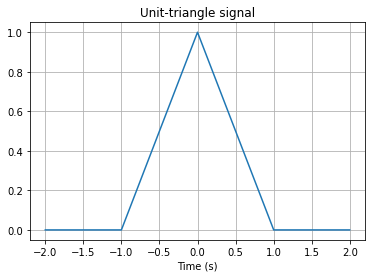

In [11]:
def ctRamp(t):
    return t*(t >= 0)


x2 = ctRamp(t+1)-2*ctRamp(t)+ctRamp(t-1)

plt.plot(t, x2)
plt.title('Unit-triangle signal')
plt.xlabel("Time (s)")
plt.grid()
plt.show()


3. Let $x_3(t)=e^{−t}\cos{10t} [u(t) − u(t−3)]$. Graph the following signals in the interval $−7\leq t\leq 7$ using a time increment of $\Delta t = 0.001\text{s}$:
   1. $x_3(t)$ (in all plots but with a different color)
   1. $x_3(0.5t)$ (in the same window but different plot)
   1. $x_3(t+2)$ (in the same window but different plot)
   1. $x_3(−t)$ (in the same window but different plot)
   1. $x_3(2t−1)$ (in the same window but different plot)


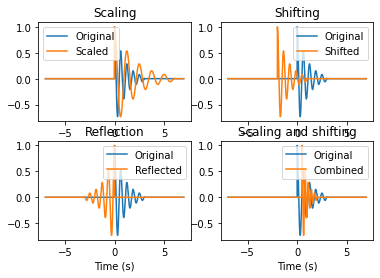

In [21]:
t = np.arange(-7, 7, 0.001)


def x3(t): return np.exp(-t)*np.cos(10*t)*(ctStep(t)-ctStep(t-3))


plt.subplot(2, 2, 1)
plt.plot(t, x3(t))
plt.title('Scaling')
plt.xlabel("Time (s)")
plt.plot(t, x3(0.5*t))
plt.legend(['Original', 'Scaled'])

plt.subplot(2, 2, 2)
plt.plot(t, x3(t))
plt.title('Shifting')
plt.xlabel("Time (s)")
plt.plot(t, x3(t+2))
plt.legend(['Original', 'Shifted'])

plt.subplot(2, 2, 3)
plt.plot(t, x3(t))
plt.title('Reflection')
plt.xlabel("Time (s)")
plt.plot(t, x3(-t))
plt.legend(['Original', 'Reflected'])

plt.subplot(2, 2, 4)
plt.plot(t, x3(t))
plt.title('Scaling and shifting')
plt.xlabel("Time (s)")
plt.plot(t, x3(2*t-1))
plt.legend(['Original', 'Combined'])

plt.show()

## Discrete-time signals.
### Plotting

1. Compute and graph the signal

   $$
   x_1[n]=\left\{0,3.1,2.5,3.7,3.2,2.6,0\right\}
   $$

   for the range of the sample index $3\leq n\leq 9$


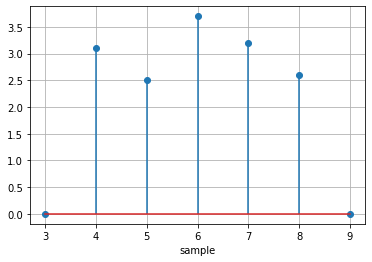

In [6]:
n = np.arange(3, 10)
x1 = [0, 3.1, 2.5, 3.7, 3.2, 2.6, 0]

plt.stem(n, x1)
plt.xlabel("sample")
plt.grid()
plt.show()


2. Compute and graph the signal

   $$
   x_2[n] = \sin{0.2n}
   $$

   for the index range $n = 0, 1, \dots , 99$


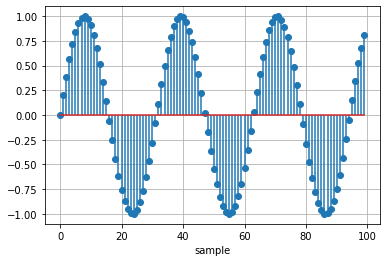

In [7]:
n = np.arange(100)
x2 = np.sin(0.2*n)

plt.stem(n, x2)
plt.xlabel("sample")
plt.grid()
plt.show()


3. Compute and graph the signal

$$
x_3[n]=
\begin{cases}
    \sin{0.2n} & n=0,1,\dots,39\\
    0          & \text{else}
\end{cases}
$$

for the interval $n = −20,\dots, 59$


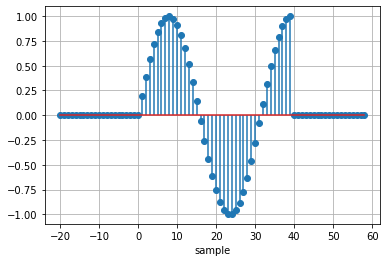

In [8]:
n = np.arange(-20, 59)
x3 = np.sin(0.2*n)*(n >= 0)*(n <= 39)

plt.stem(n, x3)
plt.xlabel("sample")
plt.grid()
plt.show()


### Basic operations
1. Implement a function for the Kronecker delta unit-impulse, unit-step and unit-ramp functions. Use the definitions to plot

$$
x_1[n]=\delta[n+2] + u[n] + r[n−1] − 2r[n−2] + r[n−4]
$$

for the range of the sample index $−3\leq n\leq 6$

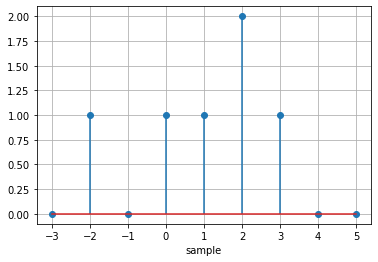

In [22]:
def dtDelta(n):
    return 1*(n==0)

def dtStep(n):
    return 1*(n>=0)

def dtRamp(n):
    return n*(n>=0)

n = np.arange(-3,6)
x1 = dtDelta(n+2) + dtStep(n) + dtRamp(n-1) -2*dtRamp(n-2) + dtRamp(n-4)

plt.stem(n, x1)
plt.xlabel("sample")
plt.grid()
plt.show()

2. Let $x_2[n]=1.2^n(u[n+3] − u[n−7])$. Graph the following signals in the interval $−13\leq n\leq 13$:
    1. $x_2[n]$ (in all plots but with a different color)
    1. $x_2[−(n+1)]$ (in the same window but different plot)
    1. $x_2[3n]$ (in the same window but different plot) 
    1. $x_2\left[\frac{n}{2}\right]$ (in the same window but different plot)


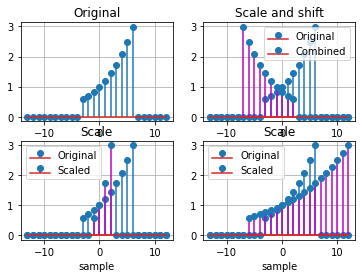

In [28]:
n = np.arange(-13,13)

x2 = lambda n: 1.2**n*(dtStep(n+3)-dtStep(n-7))

plt.subplot(2, 2, 1)
plt.stem(n, x2(n))
plt.xlabel("sample")
plt.grid()
plt.title("Original")

plt.subplot(2, 2, 2)
plt.stem(n, x2(n))
plt.xlabel("sample")
plt.grid()
plt.stem(n, x2(-(n+1)), linefmt='m')
plt.title("Scale and shift")
plt.legend(['Original','Combined'])

plt.subplot(2, 2, 3)
plt.stem(n, x2(n))
plt.xlabel("sample")
plt.grid()
plt.stem(n, x2(3*n), linefmt='m')
plt.title("Scale")
plt.legend(['Original','Scaled'])

plt.subplot(2, 2, 4)
plt.stem(n, x2(n))
plt.xlabel("sample")
plt.grid()
plt.stem(n, x2(n/2), linefmt='m')
plt.title("Scale")
plt.legend(['Original','Scaled'])

plt.show()
